In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import os, time, datetime
from datetime import datetime
import glob
import matplotlib.pyplot as plt
from matplotlib import cm as CM
from matplotlib.colors import LogNorm,PowerNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean
#https://github.com/SciTools/cartopy/issues/1246

C:\Users\xigrug\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\xigrug\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
from metpy.units import units
from scipy.ndimage import gaussian_filter

In [26]:
def plotMap():
    #Set the projection information Cannot label gridlines on a LambertConformal plot. Only PlateCarree and Mercator plots are currently supported.
##add shapefile
    # add borders, coastline, rivers, lakes, and provinces of China
    proj = ccrs.PlateCarree(central_longitude=118.8)
    #Create a figure with an axes object on which we will plot. Pass the projection to that axes.
    fig, ax = plt.subplots(figsize=(11.8, 8),subplot_kw=dict(projection=proj))
    #ax.background_img(name='BM', resolution='high')
    #Zoom in
    ax.set_extent([108, 132, 18, 50])

    #Add map features
    ax.add_feature(cfeature.LAND, facecolor='0.99') #Grayscale colors can be set using 0 (black) to 1 (white)
    ax.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
    ax.add_feature(cfeature.BORDERS.with_scale('10m'), zorder=10, linestyle=':') # high resolution
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), zorder=10, linestyle=':') # mediate resolution
    ax.add_feature(cfeature.RIVERS) # low resolution
    #ax.stock_img()

    #We can use additional features from Natural Earth (http://www.naturalearthdata.com/features/)
    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces_lines',
            scale='50m',facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
    fname = 'D:\data\map\CHN_adm1.shp'
    adm1_shapes = list(Reader(fname).geometries())
    ax.add_geometries(adm1_shapes, crs=ccrs.PlateCarree(),edgecolor='black', facecolor='none', alpha=0.5,linewidths=0.5)
    newcmap = cmocean.tools.crop_by_percent(cmocean.cm.balance, 1, which='both', N=20)
    plt.scatter(lon,lat,#latlon=True,
          c=ccn, #s=(3*tcb+10),
          #cmap=newcmap,norm=PowerNorm(gamma=0.7),alpha=0.5,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
          #cmap=CM.get_cmap('rainbow',40),norm=LogNorm(vmin=max(ccn.min(),0.1),clip=True),alpha=0.5,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
          cmap=newcmap,alpha=0.9,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
    #Add lat/lon gridlines every 20° to the map
    plt.colorbar(label=r'Cloud Fration')
    plt.clim(0,0.5)
# make legend with dummy points
    '''
    for a in [0,10,20]:
        plt.scatter([], [], c='k', alpha=0.5, s=(3*a+10),
                label=str(a)+'')
#plt.legend(scatterpoints=1, frameon=False,
#           labelspacing=1, loc='lower left',title= 'AQI',
#           bbox_to_anchor=(,0),ncol=5)
    plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left',title= 'Tb-temp',
           bbox_to_anchor=(0,-0.08,1,0.2),
           mode="expand", borderaxespad=0, ncol=6)
    '''
    #ax.barbs(lon2, lat2, uwnd_850.to('kt').m, vwnd_850.to('kt').m, pivot='middle',color='black', regrid_shape=20, transform=ccrs.PlateCarree())
    #ax.quiver(lon2, lat2, uwnd_850, vwnd_850, regrid_shape=20, transform=ccrs.PlateCarree())
    #cc = ax.scatter(lonl[::30], latl[::30],s=1,marker=',',color='white',alpha=0.5,transform=ccrs.PlateCarree())
    #plt.title("2013-2018 Summer nolight", fontsize=20)
    return fig, ax

In [11]:
ds= xr.open_dataset("D:/data/lights/light.nc")
light=ds.value
lat1 = ds.lat
lon1 = ds.lon
lons, lats = np.meshgrid(lon1, lat1)
lonl=lons[light>50]
latl=lats[light>50]

In [12]:
du = xr.open_dataset('C:/Users/xigrug/Desktop/CCN/ERA5_u-2013-2018_6-8_0500.nc')
dv = xr.open_dataset('C:/Users/xigrug/Desktop/CCN/ERA5_v-2013-2018_6-8_0500.nc')

In [13]:
lat1=du.latitude
lon1=du.longitude

In [14]:
lat1.size

721

In [15]:
lon1.size

1440

In [16]:
u=du.u.data
v=dv.v.data

In [17]:
uwnd_850 = gaussian_filter(u, sigma=3.0) * units('m/s')
vwnd_850 = gaussian_filter(v, sigma=3.0) * units('m/s')

In [18]:
uwnd_850.size

1038240

In [19]:
cities=pd.read_table("allsum-0.5-NaN - count10.csv",sep=',',na_values=[-9999])

C:\Users\xigrug\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [21]:
cities.head()

,lat_bin,lon_bin,Count,AMR_lowest,AMR_surf,AOD,B4LI,CAPE,CAPE_lowest,CAPE_nc,...,row,satz,solz,sound_D(km),sound_ID,sound_hour,sumN_0.5,sumN_0.5_sumN_1.0,sumN_1.0,winNO
0,7.0,124.5,2,NaN,NaN,NaN,-1.300,167.00,NaN,139.0,...,6144.0,-6.28,20.040,NaN,NaN,NaN,289.0,1.0000,289.00,1103.0
1,7.0,125.5,4,NaN,NaN,NaN,-2.450,358.00,NaN,139.0,...,6096.0,-0.48,20.480,NaN,NaN,NaN,191.5,1.0000,191.50,1102.5
2,7.5,124.0,8,NaN,NaN,NaN,-1.825,187.25,NaN,315.5,...,5904.0,-10.65,19.155,NaN,NaN,NaN,1088.0,0.9975,1092.75,2304.5
3,7.5,125.0,2,NaN,NaN,NaN,-2.400,376.00,NaN,139.0,...,5952.0,-0.48,20.200,NaN,NaN,NaN,3585.0,1.0000,3588.00,1107.0
4,8.0,123.5,2,NaN,NaN,NaN,-2.600,483.00,NaN,346.0,...,5760.0,-12.11,18.730,NaN,NaN,NaN,184.0,1.0000,184.00,3405.0


C:\Users\xigrug\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


0.48335384600000003
0.020525
24.6875
-2.272727273


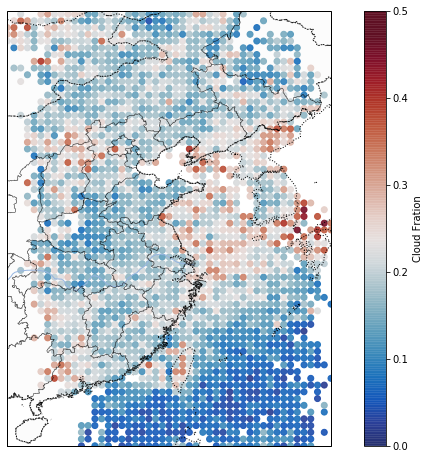

In [27]:
cities=pd.read_table("allsum-0.5-NaN - count10.csv",sep=',',na_values=[-9999])
cities=cities[cities['Count']>=10]
lat = cities['lat_bin'].values
lon = cities['lon_bin'].values
ccn = cities['Cloud_fra'].values
tcb = cities['Tcb1.0'].values
lat_max=np.nanmax(lat)
lon_max=np.nanmax(lon)
lat_min=np.nanmin(lat)
lon_min=np.nanmin(lon)
ccn_max=np.nanmax(ccn)
print(ccn_max)
ccn_min=np.nanmin(ccn)
print(ccn_min)
tcb_max=np.nanmax(tcb)
print(tcb_max)
tcb_min=np.nanmin(tcb)
print(tcb_min)

fig, ax= plotMap()
plt.savefig('avg_Cloud_fra_filterplh-nolightwind-count10.png',dpi=200)

In [46]:
def plotMap_hcb():
    #Set the projection information Cannot label gridlines on a LambertConformal plot. Only PlateCarree and Mercator plots are currently supported.
##add shapefile
    # add borders, coastline, rivers, lakes, and provinces of China
    proj = ccrs.PlateCarree(central_longitude=118.8)
    #Create a figure with an axes object on which we will plot. Pass the projection to that axes.
    fig, ax = plt.subplots(figsize=(11.8, 8),subplot_kw=dict(projection=proj))
    #ax.background_img(name='BM', resolution='high')
    #Zoom in
    ax.set_extent([108, 132, 18, 50])

    #Add map features
    ax.add_feature(cfeature.LAND, facecolor='0.99') #Grayscale colors can be set using 0 (black) to 1 (white)
    ax.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
    ax.add_feature(cfeature.BORDERS.with_scale('10m'), zorder=10, linestyle=':') # high resolution
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), zorder=10, linestyle=':') # mediate resolution
    ax.add_feature(cfeature.RIVERS) # low resolution
    #ax.stock_img()

    #We can use additional features from Natural Earth (http://www.naturalearthdata.com/features/)
    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces_lines',
            scale='50m',facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
    fname = 'D:\data\map\CHN_adm1.shp'
    adm1_shapes = list(Reader(fname).geometries())
    ax.add_geometries(adm1_shapes, crs=ccrs.PlateCarree(),edgecolor='black', facecolor='none', alpha=0.5,linewidths=0.5)
    newcmap = cmocean.tools.crop_by_percent(cmocean.cm.balance, 1, which='both', N=20)
    plt.scatter(lon,lat,#latlon=True,
          c=ccn, #s=(3*tcb+10),
          #cmap=newcmap,norm=PowerNorm(gamma=0.7),alpha=0.5,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
          #cmap=CM.get_cmap('rainbow',40),norm=LogNorm(vmin=max(ccn.min(),0.1),clip=True),alpha=0.5,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
          cmap=newcmap,alpha=0.9,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
    #Add lat/lon gridlines every 20° to the map
    plt.colorbar(label=r'Cloud Base Height (m)')
    plt.clim(500,3000)
# make legend with dummy points
    '''
    for a in [0,10,20]:
        plt.scatter([], [], c='k', alpha=0.5, s=(3*a+10),
                label=str(a)+'')
#plt.legend(scatterpoints=1, frameon=False,
#           labelspacing=1, loc='lower left',title= 'AQI',
#           bbox_to_anchor=(,0),ncol=5)
    plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left',title= 'Tb-temp',
           bbox_to_anchor=(0,-0.08,1,0.2),
           mode="expand", borderaxespad=0, ncol=6)
    '''
    #ax.barbs(lon2, lat2, uwnd_850.to('kt').m, vwnd_850.to('kt').m, pivot='middle',color='black', regrid_shape=20, transform=ccrs.PlateCarree())
    #ax.quiver(lon2, lat2, uwnd_850, vwnd_850, regrid_shape=20, transform=ccrs.PlateCarree())
    #cc = ax.scatter(lonl[::30], latl[::30],s=1,marker=',',color='white',alpha=0.5,transform=ccrs.PlateCarree())
    #plt.title("2013-2018 Summer nolight", fontsize=20)
    return fig, ax

C:\Users\xigrug\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


2908.636364
508.83333330000005


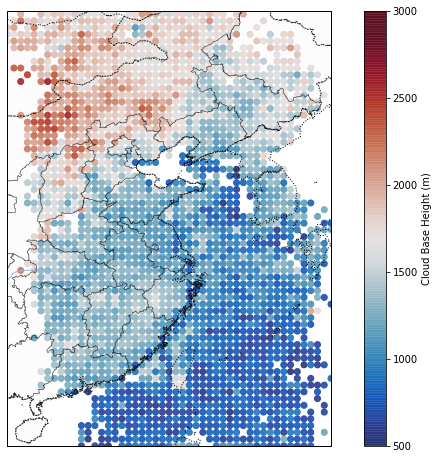

In [47]:
cities=pd.read_table("allsum-0.5-NaN - count10.csv",sep=',',na_values=[-9999])
cities=cities[cities['Count']>=10]
lat = cities['lat_bin'].values
lon = cities['lon_bin'].values
ccn = cities['Hcbs0.5'].values
lat_max=np.nanmax(lat)
lon_max=np.nanmax(lon)
lat_min=np.nanmin(lat)
lon_min=np.nanmin(lon)
ccn_max=np.nanmax(ccn)
print(ccn_max)
ccn_min=np.nanmin(ccn)
print(ccn_min)

fig, ax= plotMap_hcb()
plt.savefig('avg_Hcb0.5_filterplh-count10.png',dpi=200)

In [53]:
def plotMap_Recb():
    #Set the projection information Cannot label gridlines on a LambertConformal plot. Only PlateCarree and Mercator plots are currently supported.
##add shapefile
    # add borders, coastline, rivers, lakes, and provinces of China
    proj = ccrs.PlateCarree(central_longitude=118.8)
    #Create a figure with an axes object on which we will plot. Pass the projection to that axes.
    fig, ax = plt.subplots(figsize=(11.8, 8),subplot_kw=dict(projection=proj))
    #ax.background_img(name='BM', resolution='high')
    #Zoom in
    ax.set_extent([108, 132, 18, 50])

    #Add map features
    ax.add_feature(cfeature.LAND, facecolor='0.99') #Grayscale colors can be set using 0 (black) to 1 (white)
    ax.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
    ax.add_feature(cfeature.BORDERS.with_scale('10m'), zorder=10, linestyle=':') # high resolution
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), zorder=10, linestyle=':') # mediate resolution
    ax.add_feature(cfeature.RIVERS) # low resolution
    #ax.stock_img()

    #We can use additional features from Natural Earth (http://www.naturalearthdata.com/features/)
    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces_lines',
            scale='50m',facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
    fname = 'D:\data\map\CHN_adm1.shp'
    adm1_shapes = list(Reader(fname).geometries())
    ax.add_geometries(adm1_shapes, crs=ccrs.PlateCarree(),edgecolor='black', facecolor='none', alpha=0.5,linewidths=0.5)
    newcmap = cmocean.tools.crop_by_percent(cmocean.cm.balance, 1, which='both', N=20)
    plt.scatter(lon,lat,#latlon=True,
          c=ccn, #s=(3*tcb+10),
          #cmap=newcmap,norm=PowerNorm(gamma=0.7),alpha=0.5,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
          #cmap=CM.get_cmap('rainbow',40),norm=LogNorm(vmin=max(ccn.min(),0.1),clip=True),alpha=0.5,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
          cmap=newcmap,alpha=0.9,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
    #Add lat/lon gridlines every 20° to the map
    plt.colorbar(label=r'Cloud Base Re (m)')
    plt.clim(4,14)
# make legend with dummy points
    '''
    for a in [0,10,20]:
        plt.scatter([], [], c='k', alpha=0.5, s=(3*a+10),
                label=str(a)+'')
#plt.legend(scatterpoints=1, frameon=False,
#           labelspacing=1, loc='lower left',title= 'AQI',
#           bbox_to_anchor=(,0),ncol=5)
    plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left',title= 'Tb-temp',
           bbox_to_anchor=(0,-0.08,1,0.2),
           mode="expand", borderaxespad=0, ncol=6)
    '''
    #ax.barbs(lon2, lat2, uwnd_850.to('kt').m, vwnd_850.to('kt').m, pivot='middle',color='black', regrid_shape=20, transform=ccrs.PlateCarree())
    #ax.quiver(lon2, lat2, uwnd_850, vwnd_850, regrid_shape=20, transform=ccrs.PlateCarree())
    #cc = ax.scatter(lonl[::30], latl[::30],s=1,marker=',',color='white',alpha=0.5,transform=ccrs.PlateCarree())
    #plt.title("2013-2018 Summer nolight", fontsize=20)
    return fig, ax

C:\Users\xigrug\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


13.65454545
4.6375


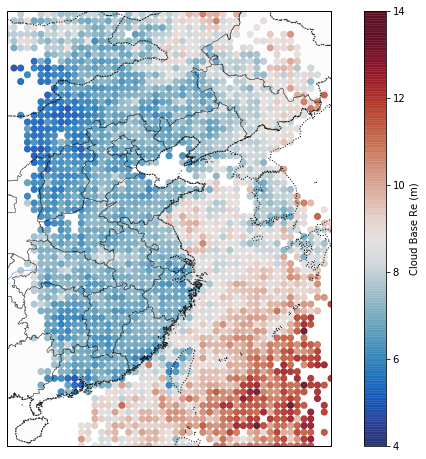

In [54]:
cities=pd.read_table("allsum-0.5-NaN - count10.csv",sep=',',na_values=[-9999])
cities=cities[cities['Count']>=10]
lat = cities['lat_bin'].values
lon = cities['lon_bin'].values
ccn = cities['Recb0.5'].values
lat_max=np.nanmax(lat)
lon_max=np.nanmax(lon)
lat_min=np.nanmin(lat)
lon_min=np.nanmin(lon)
ccn_max=np.nanmax(ccn)
print(ccn_max)
ccn_min=np.nanmin(ccn)
print(ccn_min)

fig, ax= plotMap_Recb()
plt.savefig('avg_recb0.5_filterplh-count10.png',dpi=200)

In [66]:
def plotMap_Wcb():
    #Set the projection information Cannot label gridlines on a LambertConformal plot. Only PlateCarree and Mercator plots are currently supported.
##add shapefile
    # add borders, coastline, rivers, lakes, and provinces of China
    proj = ccrs.PlateCarree(central_longitude=118.8)
    #Create a figure with an axes object on which we will plot. Pass the projection to that axes.
    fig, ax = plt.subplots(figsize=(11.8, 8),subplot_kw=dict(projection=proj))
    #ax.background_img(name='BM', resolution='high')
    #Zoom in
    ax.set_extent([108, 132, 18, 50])

    #Add map features
    ax.add_feature(cfeature.LAND, facecolor='0.99') #Grayscale colors can be set using 0 (black) to 1 (white)
    ax.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
    ax.add_feature(cfeature.BORDERS.with_scale('10m'), zorder=10, linestyle=':') # high resolution
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), zorder=10, linestyle=':') # mediate resolution
    ax.add_feature(cfeature.RIVERS) # low resolution
    #ax.stock_img()

    #We can use additional features from Natural Earth (http://www.naturalearthdata.com/features/)
    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces_lines',
            scale='50m',facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
    fname = 'D:\data\map\CHN_adm1.shp'
    adm1_shapes = list(Reader(fname).geometries())
    ax.add_geometries(adm1_shapes, crs=ccrs.PlateCarree(),edgecolor='black', facecolor='none', alpha=0.5,linewidths=0.5)
    newcmap = cmocean.tools.crop_by_percent(cmocean.cm.tarn, 1, which='both', N=20)
    plt.scatter(lon,lat,#latlon=True,
          c=ccn, #s=(3*tcb+10),
          #cmap=newcmap,norm=PowerNorm(gamma=0.7),alpha=0.5,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
          #cmap=CM.get_cmap('rainbow',40),norm=LogNorm(vmin=max(ccn.min(),0.1),clip=True),alpha=0.5,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
          cmap=newcmap,alpha=0.9,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
    #Add lat/lon gridlines every 20° to the map
    plt.colorbar(label=r'Cloud Base W (m/s)')
    plt.clim(0.45,2.62)
# make legend with dummy points
    '''
    for a in [0,10,20]:
        plt.scatter([], [], c='k', alpha=0.5, s=(3*a+10),
                label=str(a)+'')
#plt.legend(scatterpoints=1, frameon=False,
#           labelspacing=1, loc='lower left',title= 'AQI',
#           bbox_to_anchor=(,0),ncol=5)
    plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left',title= 'Tb-temp',
           bbox_to_anchor=(0,-0.08,1,0.2),
           mode="expand", borderaxespad=0, ncol=6)
    '''
    #ax.barbs(lon2, lat2, uwnd_850.to('kt').m, vwnd_850.to('kt').m, pivot='middle',color='black', regrid_shape=20, transform=ccrs.PlateCarree())
    #ax.quiver(lon2, lat2, uwnd_850, vwnd_850, regrid_shape=20, transform=ccrs.PlateCarree())
    #cc = ax.scatter(lonl[::30], latl[::30],s=1,marker=',',color='white',alpha=0.5,transform=ccrs.PlateCarree())
    #plt.title("2013-2018 Summer nolight", fontsize=20)
    return fig, ax

C:\Users\xigrug\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


2.618181818
0.457083333


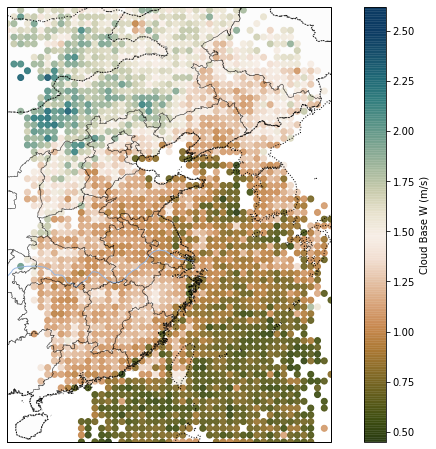

In [67]:
cities=pd.read_table("allsum-0.5-NaN - count10.csv",sep=',',na_values=[-9999])
cities=cities[cities['Count']>=10]
lat = cities['lat_bin'].values
lon = cities['lon_bin'].values
ccn = cities['Wb_0.5'].values
lat_max=np.nanmax(lat)
lon_max=np.nanmax(lon)
lat_min=np.nanmin(lat)
lon_min=np.nanmin(lon)
ccn_max=np.nanmax(ccn)
print(ccn_max)
ccn_min=np.nanmin(ccn)
print(ccn_min)

fig, ax= plotMap_Wcb()
plt.savefig('avg_Wcb0.5_filterplh-count10.png',dpi=200)

In [48]:
def plotMap():
    #Set the projection information Cannot label gridlines on a LambertConformal plot. Only PlateCarree and Mercator plots are currently supported.
##add shapefile
    # add borders, coastline, rivers, lakes, and provinces of China
    proj = ccrs.PlateCarree(central_longitude=118.8)
    #Create a figure with an axes object on which we will plot. Pass the projection to that axes.
    fig, ax = plt.subplots(figsize=(11.8, 8),subplot_kw=dict(projection=proj))
    #ax.background_img(name='BM', resolution='high')
    #Zoom in
    ax.set_extent([108, 132, 18, 50])

    #Add map features
    ax.add_feature(cfeature.LAND, facecolor='0.99') #Grayscale colors can be set using 0 (black) to 1 (white)
    ax.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
    ax.add_feature(cfeature.BORDERS.with_scale('10m'), zorder=10, linestyle=':') # high resolution
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), zorder=10, linestyle=':') # mediate resolution
    ax.add_feature(cfeature.RIVERS) # low resolution
    #ax.stock_img()

    #We can use additional features from Natural Earth (http://www.naturalearthdata.com/features/)
    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces_lines',
            scale='50m',facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
    fname = 'D:\data\map\CHN_adm1.shp'
    adm1_shapes = list(Reader(fname).geometries())
    ax.add_geometries(adm1_shapes, crs=ccrs.PlateCarree(),edgecolor='black', facecolor='none', alpha=0.5,linewidths=0.5)
    newcmap = cmocean.tools.crop_by_percent(cmocean.cm.curl, 1, which='both', N=20)
    plt.scatter(lon,lat,#latlon=True,
          c=ccn, s=(0.01*tcb+10),
          #cmap=newcmap,norm=PowerNorm(gamma=0.7),alpha=0.5,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
          #cmap=CM.get_cmap('rainbow',40),norm=LogNorm(vmin=max(ccn.min(),0.1),clip=True),alpha=0.5,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
          cmap=newcmap,alpha=0.9,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
    #Add lat/lon gridlines every 20° to the map
    plt.colorbar(label=r'H14-Hcb (m)')
    plt.clim(0,7000)
# make legend with dummy points
    for a in [0,10,20]:
        plt.scatter([], [], c='k', alpha=0.5, s=(0.01*a+10),
                label=str(a)+'')
#plt.legend(scatterpoints=1, frameon=False,
#           labelspacing=1, loc='lower left',title= 'AQI',
#           bbox_to_anchor=(,0),ncol=5)
    plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left',title= 'Tb-temp',
           bbox_to_anchor=(0,-0.08,1,0.2),
           mode="expand", borderaxespad=0, ncol=6)
    #ax.barbs(lon2, lat2, uwnd_850.to('kt').m, vwnd_850.to('kt').m, pivot='middle',color='black', regrid_shape=20, transform=ccrs.PlateCarree())
    #ax.quiver(lon2, lat2, uwnd_850, vwnd_850, regrid_shape=20, transform=ccrs.PlateCarree())
    #cc = ax.scatter(lonl[::30], latl[::30],s=1,marker=',',color='white',alpha=0.5,transform=ccrs.PlateCarree())
    #plt.title("2013-2018 Summer nolight", fontsize=20)
    return fig, ax

C:\Users\xigrug\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


7167.727273
343.16666670000006
2908.636364
508.83333330000005


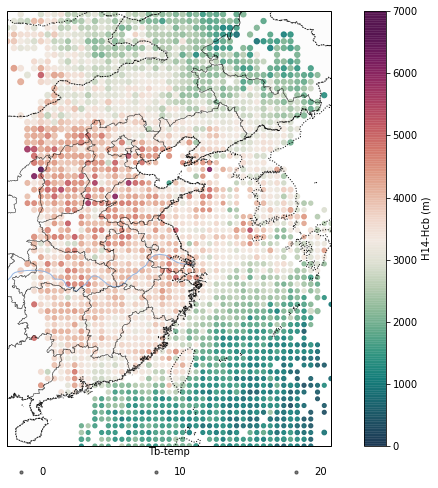

In [49]:
cities=pd.read_table("allsum-0.5-NaN - count10.csv",sep=',',na_values=[-9999])
cities=cities[cities['Count']>=10]
lat = cities['lat_bin'].values
lon = cities['lon_bin'].values
ccn0 = cities['H14_0.5'].values
tcb = cities['Hcbs0.5'].values
ccn = ccn0-tcb
lat_max=np.nanmax(lat)
lon_max=np.nanmax(lon)
lat_min=np.nanmin(lat)
lon_min=np.nanmin(lon)
ccn_max=np.nanmax(ccn)
print(ccn_max)
ccn_min=np.nanmin(ccn)
print(ccn_min)
tcb_max=np.nanmax(tcb)
print(tcb_max)
tcb_min=np.nanmin(tcb)
print(tcb_min)
fig, ax= plotMap()
plt.savefig('avg_CCN_filterplh-h14_hcb-count10.png',dpi=200)

In [31]:
ccn.max()

7167.727273